In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def calculate_hourly_util(group):
    matching_rate = group.columns.get_loc("matchingRate")
    # Sum of totalUtility for this group
    avg_matching_rate = group.iloc[1:, matching_rate].mean()

    # Use the first timestamp in the group as representative
    timestamp = group.iloc[0]["hour_only"]
    
    return pd.Series({"timestamp": timestamp, "matching_rate": avg_matching_rate})


def aggregate_matching_rate(file_path):
    utility_df = pd.read_excel(file_path)
    utility_df["timestamp"] = pd.to_datetime(utility_df["timestamp"])
    utility_df["hour_only"] = utility_df["timestamp"].dt.strftime("%H:00")
    aggregated_df = utility_df.groupby("hour_only").apply(calculate_hourly_util).reset_index(drop=True)
    return aggregated_df


In [8]:
file_path_1 = "../../centralOperator-microservice/output/0405_13:53:02_matching-rate.xlsx"
file_path_2 = "../../centralOperator-microservice/output/0405_16-41-36_matching-rate.xlsx"

In [9]:
data_1 = aggregate_matching_rate(file_path_1)
data_2 = aggregate_matching_rate(file_path_2)

/opt/anaconda3/envs/didi_env/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/xb/x956wlq50sl0s12y4dxzyxsc0000gn/T/ipykernel_9366/3991201166.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  utility_df["timestamp"] = pd.to_datetime(utility_df["timestamp"])
/var/folders/xb/x956wlq50sl0s12y4dxzyxsc0000gn/T/ipykernel_9366/3991201166.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aggre

In [10]:
data_1.head(10)

,timestamp,matching_rate
0,09:00,0.158333
1,10:00,0.119201
2,11:00,0.096755
3,12:00,0.064306
4,13:00,0.055620
5,14:00,0.036650
6,15:00,0.045751
7,16:00,0.027724
8,17:00,0.022663
9,18:00,0.016055


In [11]:
merged_df = pd.merge(data_1, data_2, on="timestamp", how="outer", suffixes=("_1", "_2")).sort_values("timestamp").reset_index(drop=True)
merged_df.head(10)

,timestamp,matching_rate_1,matching_rate_2
0,09:00,0.158333,0.368357
1,10:00,0.119201,0.382066
2,11:00,0.096755,0.438480
3,12:00,0.064306,0.291868
4,13:00,0.055620,0.328283
5,14:00,0.036650,0.295985
6,15:00,0.045751,0.252306
7,16:00,0.027724,0.240000
8,17:00,0.022663,NaN
9,18:00,0.016055,NaN


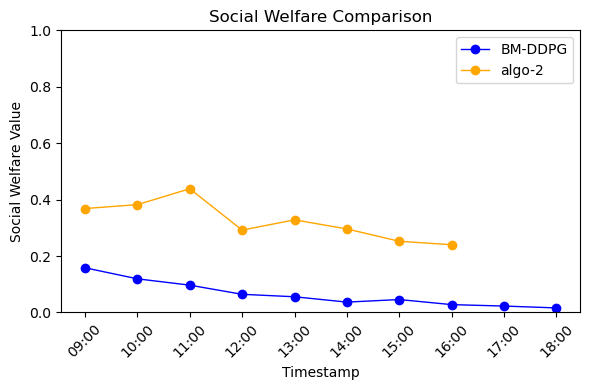

In [12]:
df_plot = merged_df.loc[0:9]

# Create the plot
plt.figure(figsize=(6, 4))  # Adjust size as needed for your paper
plt.plot(df_plot['timestamp'], df_plot['matching_rate_1'], color='blue', linestyle='-', linewidth=1, marker='o', label='BM-DDPG')
plt.plot(df_plot['timestamp'], df_plot['matching_rate_2'], color='orange', linestyle='-', linewidth=1, marker='o', label='algo-2')

# Labels and title
plt.title("Matching Rate Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Matching Rate")

# Optional: Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Optional: Tight layout to prevent label cutoff
# Labels and legend
plt.xlabel("Timestamp")
plt.ylabel("Social Welfare Value")
plt.title("Social Welfare Comparison")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig("hourly_utility_plot.png", dpi=300, bbox_inches='tight')  # For slides or previews

# Show the plot
plt.show()